In [2]:
%pip install numpy pandas seaborn matplotlib # install the necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from functions import *


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
goyal_welch_data = pd.read_csv('../macro_data/GoyalWelchPredictorData2022Monthly.csv', index_col=0)
goyal_welch_data.index = pd.to_datetime(goyal_welch_data.index, format='%Y%m')

for column in goyal_welch_data.columns:
    goyal_welch_data[column] = [float(str(x).replace(',', '')) for x in goyal_welch_data[column]]


In [4]:
goyal_welch_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-01,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-04-01,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-05-01,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.0421,-0.0293,0.003349,NaN,-0.040305,-0.042052
2022-09-01,3585.62,65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.0769,-0.0526,0.004934,NaN,-0.091495,-0.092876
2022-10-01,3871.98,65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.0139,-0.0103,0.006504,NaN,0.080248,0.079196


# GLD ticker 

In [5]:
gld_monthly_returns = pd.read_csv('../macro_data/gld_monthly_returns.csv', index_col=0)

gld_monthly_returns.index = pd.to_datetime(gld_monthly_returns.index, format='%Y-%m-%d')


In [6]:
start_date = goyal_welch_data.index.min() if goyal_welch_data.index.min() > gld_monthly_returns.index.min() else gld_monthly_returns.index.min()
end_date = goyal_welch_data.index.max() if goyal_welch_data.index.max() < gld_monthly_returns.index.max() else gld_monthly_returns.index.max()

start_date, end_date

(Timestamp('2005-01-01 00:00:00'), Timestamp('2022-12-01 00:00:00'))

In [7]:
filtered_spy_monthly_returns = gld_monthly_returns.loc[start_date:end_date]
filtered_goyal_welch_data = goyal_welch_data.loc[start_date:end_date]

filtered_goyal_welch_data['excess_returns'] = gld_monthly_returns['GLD'] - filtered_goyal_welch_data['Rfree']

filtered_goyal_welch_data['excess_returns']

/tmp/ipykernel_3316/1243567426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_goyal_welch_data['excess_returns'] = gld_monthly_returns['GLD'] - filtered_goyal_welch_data['Rfree']


yyyymm
2005-01-01   -0.030855
2005-02-01   -0.037673
2005-03-01    0.028928
2005-04-01   -0.018411
2005-05-01    0.009977
                ...   
2022-08-01   -0.027782
2022-09-01   -0.031333
2022-10-01   -0.031182
2022-11-01   -0.020744
2022-12-01    0.081619
Name: excess_returns, Length: 216, dtype: float64

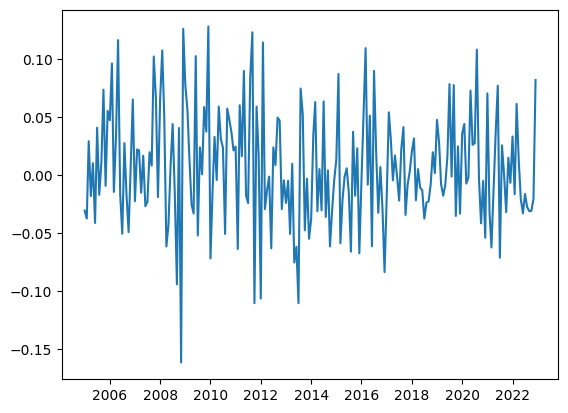

In [8]:
plt.plot(filtered_goyal_welch_data['excess_returns'])

Text(0.5, 1.0, 'leverage = 0.6')

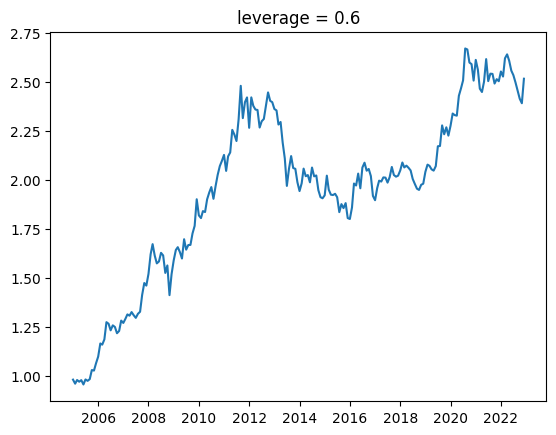

In [9]:
leverage = 0.6
strategy_returns = 1 + filtered_goyal_welch_data.Rfree + leverage * filtered_goyal_welch_data.excess_returns
plt.plot(np.cumprod(strategy_returns))
plt.title(f'leverage = {leverage}')

In [10]:
cleaned_data = filtered_goyal_welch_data.drop(columns=['csp']).fillna(0)

In [11]:
cleaned_data[['Index', 'D12', 'E12']] = (cleaned_data[['Index', 'D12', 'E12']] / cleaned_data[['Index', 'D12', 'E12']].shift(1)).fillna(0)
print(cleaned_data)

               Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                       
2005-01-01  0.000000  0.000000  0.000000  0.278180  0.0233  0.0536  0.0602   
2005-02-01  1.018903  1.013247  1.009417  0.271041  0.0254  0.0520  0.0582   
2005-03-01  0.980882  1.013074  1.009331  0.319857  0.0274  0.0540  0.0606   
2005-04-01  0.979891  1.011535  1.016827  0.329624  0.0278  0.0533  0.0605   
2005-05-01  1.029952  1.011409  1.016550  0.320966  0.0284  0.0515  0.0601   
...              ...       ...       ...       ...     ...     ...     ...   
2022-08-01  0.957560  1.006717  0.990938  0.227429  0.0263  0.0407  0.0515   
2022-09-01  0.906604  1.006672  0.990855  0.249478  0.0313  0.0459  0.0569   
2022-10-01  1.079863  1.008188  0.974467  0.218935  0.0372  0.0510  0.0626   
2022-11-01  1.053753  1.008123  0.973799  0.207182  0.0415  0.0490  0.0607   
2022-12-01  0.941029  1.008056  0.973093  0.216199  0.0425  0.04

In [12]:
signal_columns = ['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar']

data_for_signals = cleaned_data[signal_columns].shift(1).fillna(0) # shifting of signals happens here !
labels = cleaned_data.excess_returns.values.reshape(-1, 1)
data_for_signals['infl'] = data_for_signals['infl'].shift(1).fillna(0) # this is because inflation is actually published later
signals = data_for_signals.values
data_for_signals.shape, data_for_signals.columns

((216, 14),
 Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar'],
       dtype='object'))

In [13]:
data_for_signals

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar
yyyymm,,,,,,,,,,,,,,
2005-01-01,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000
2005-02-01,0.000000,0.000000,0.000000,0.278180,0.0233,0.0536,0.0602,0.0465,0.013545,0.0016,0.000000,0.0300,0.0277,0.000821
2005-03-01,1.018903,1.013247,1.009417,0.271041,0.0254,0.0520,0.0582,0.0479,0.011758,0.0016,0.002102,-0.0128,-0.0112,0.000834
2005-04-01,0.980882,1.013074,1.009331,0.319857,0.0274,0.0540,0.0606,0.0488,0.009097,0.0021,0.005768,-0.0072,-0.0125,0.000860
2005-05-01,0.979891,1.011535,1.016827,0.329624,0.0278,0.0533,0.0605,0.0461,0.007936,0.0021,0.007821,0.0373,0.0327,0.001826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,1.091116,1.006762,0.991019,0.218187,0.0223,0.0406,0.0521,0.0290,-0.006121,0.0008,0.013736,0.0270,0.0324,0.003188
2022-09-01,0.957560,1.006717,0.990938,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.0019,-0.000118,-0.0421,-0.0293,0.003349
2022-10-01,0.906604,1.006672,0.990855,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.0019,-0.000354,-0.0769,-0.0526,0.004934


In [14]:
normalize_raw_data = True
cheat_and_use_future_data = False  # set to True if you want to have
#our fun experiment to show how even know a bit about the future can drastically imprpve performance

shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

split = int(signals.shape[0] / 2)
train_labels = labels[:split]
test_labels = labels[split:]

if normalize_raw_data:
    signals[:split, :], normalization_based_on_train = normalize(signals[:split], use_std=False)
    # this is our fun experiment to show how even know a bit about the future can drastically imprpve performance
    if cheat_and_use_future_data:
      signals[split:, :] = normalize(signals[split:, :])[0]
    else:
      signals[split:, :] = normalize(signals[split:, :],
                                     ready_normalization=normalization_based_on_train)[0]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=signals[:split, :],
                                                                labels=train_labels,
                                                                future_signals=signals[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2014-01-01      0.018999      0.019056      0.019419      0.019787   
2014-02-01      0.029410      0.029311      0.028733      0.027150   
2014-03-01      0.013580      0.013586      0.013159      0.009682   
2014-04-01     -0.005250     -0.005040     -0.003684      0.000378   
2014-05-01     -0.010486     -0.010349     -0.009391     -0.005617   
...                  ...           ...           ...           ...   
2022-08-01      0.093819      0.092153      0.078435      0.023912   
2022-09-01      0.037837      0.037434      0.033128      0.013374   
2022-10-01      0.029870      0.029662      0.026562      0.008828   
2022-11-01      0.091902      0.090947      0.082125      0.041301   
2022-12-01      0.076153      0.075365      0.068532      0.039388   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [15]:
pd.DataFrame(beta_estimate_using_train_sample, columns=shrinkage_list, index=data_for_signals.columns)

,1.000000e-08,1.000000e-05,1.000000e-04,1.000000e-03,1.000000e-02,1.000000e-01,1.000000e+00,1.000000e+01,1.000000e+02,1.000000e+03
Index,0.167332,0.165694,0.150944,0.075919,0.021367,0.007739,0.002612,0.000425,4.566838e-05,4.601151e-06
D12,-0.112781,-0.112334,-0.105131,-0.049506,0.000757,0.006240,0.002803,0.000475,5.126767e-05,5.167548e-06
E12,0.101971,0.101410,0.096186,0.070067,0.025355,0.004040,0.000482,0.000051,5.197516e-06,5.203497e-07
b/m,-0.186451,-0.183221,-0.158593,-0.073693,-0.012319,0.002351,0.001270,0.000222,2.402852e-05,2.423070e-06
tbl,0.219638,0.217226,0.196120,0.095941,0.018716,0.004489,0.000435,-0.000013,-2.586254e-06,-2.733523e-07
AAA,-0.185484,-0.174899,-0.115889,-0.017682,0.010179,0.006304,0.002151,0.000339,3.617362e-05,3.642561e-06
BAA,0.423678,0.412507,0.336305,0.126655,0.024617,0.006349,0.001545,0.000227,2.400471e-05,2.415179e-06
lty,-0.051559,-0.053690,-0.056885,-0.013594,0.008235,0.005091,0.001921,0.000302,3.221250e-05,3.243238e-06
ntis,0.069605,0.068313,0.058222,0.026270,0.014116,0.006139,0.001179,0.000158,1.660727e-05,1.669174e-06
Rfree,-0.226388,-0.223671,-0.201244,-0.098665,-0.013644,0.000524,-0.000062,-0.000069,-8.332922e-06,-8.492878e-07


In [16]:
market_timing_returns = oos_predictions * test_labels.reshape(-1, 1)
print(market_timing_returns) # we have one timing return for each value of z

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2014-01-01     -0.000721     -0.000723     -0.000737     -0.000751   
2014-02-01      0.001005      0.001002      0.000982      0.000928   
2014-03-01      0.000851      0.000852      0.000825      0.000607   
2014-04-01      0.000165      0.000158      0.000116     -0.000012   
2014-05-01     -0.000052     -0.000051     -0.000046     -0.000028   
...                  ...           ...           ...           ...   
2022-08-01     -0.002606     -0.002560     -0.002179     -0.000664   
2022-09-01     -0.001186     -0.001173     -0.001038     -0.000419   
2022-10-01     -0.000931     -0.000925     -0.000828     -0.000275   
2022-11-01     -0.001906     -0.001887     -0.001704     -0.000857   
2022-12-01      0.006216      0.006151      0.005593      0.003215   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [17]:
cleaned_data = pd.concat([cleaned_data, market_timing_returns], axis=1)

In [18]:
tmp = cleaned_data[['excess_returns'] + shrinkage_list].iloc[split:]
tmp = tmp / tmp.std()
sr = sharpe_ratio(tmp)

Text(0.5, 1.0, 'SR=[0.26 0.63 0.63 0.66 0.86 0.87 0.59 0.24 0.2  0.2  0.2 ]')

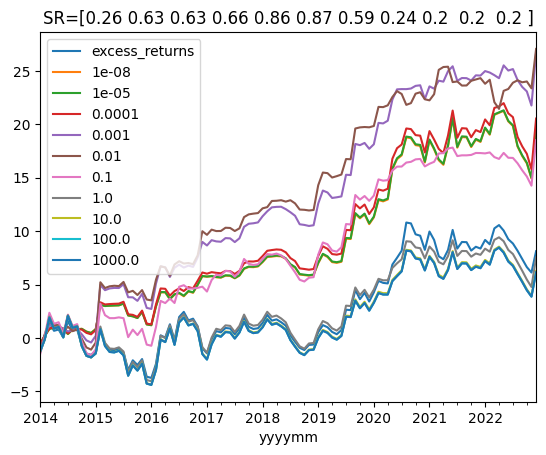

In [19]:
tmp.cumsum().plot()
plt.title(f'SR={sr.values.flatten()}')

In [20]:
tstat = regression_with_tstats(predicted_variable=tmp[1.], explanatory_variables=tmp['excess_returns'])
print(tstat)

const             -0.2
excess_returns    14.0
Name: z, dtype: float64


In [21]:
P = 50000
d = 14
scale = 1.
omega = scale * np.sqrt(2) * np.random.randn(d, P) / np.sqrt(d)
ins_sin = np.sqrt(2) * np.sin(signals @ omega) # this is n times P
ins_cos = np.sqrt(2) * np.cos(signals @ omega) # this is also n times P
random_features = np.append(ins_sin, ins_cos, axis=1) # this is n times (2P)

In [22]:
random_features.shape

(216, 100000)

In [23]:
split = int(signals.shape[0] / 2)

labels = cleaned_data.excess_returns.values.reshape(-1, 1)

train_labels = labels[:split]
test_labels = labels[split:]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=random_features[:split, :],
                                                                labels=train_labels,
                                                                future_signals=random_features[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2014-01-01      0.057576      0.054000      0.035674      0.005726   
2014-02-01     -0.005154     -0.007326     -0.017331     -0.014194   
2014-03-01      0.023355      0.024063      0.027606      0.025235   
2014-04-01      0.112073      0.108909      0.093235      0.054141   
2014-05-01      0.161457      0.158356      0.141714      0.085902   
...                  ...           ...           ...           ...   
2022-08-01     -0.017799     -0.082795     -0.331611     -0.399836   
2022-09-01     -1.201901     -1.152360     -0.887489     -0.377754   
2022-10-01     -1.462310     -1.399495     -1.053556     -0.392143   
2022-11-01     -0.044279     -0.065961     -0.140555     -0.099839   
2022-12-01      0.136261      0.107855     -0.008009     -0.064724   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

Text(0.5, 1.0, 'sr=excess_returns    0.26\n0.0               0.63\n0.00001           0.63\n0.0001            0.66\n0.001             0.86\n0.01              0.87\n0.1               0.59\n1.0               0.24\n10.0              0.20\n100.0             0.20\n1000.0            0.20\n1e-08_complex    -0.09\n1e-05_complex    -0.11\n0.0001_complex   -0.21\n0.001_complex    -0.36\n0.01_complex     -0.52\n0.1_complex      -0.29\n1.0_complex       0.00\n10.0_complex      0.37\n100.0_complex     0.58\n1000.0_complex    0.64\nmean              0.52\ndtype: float64')

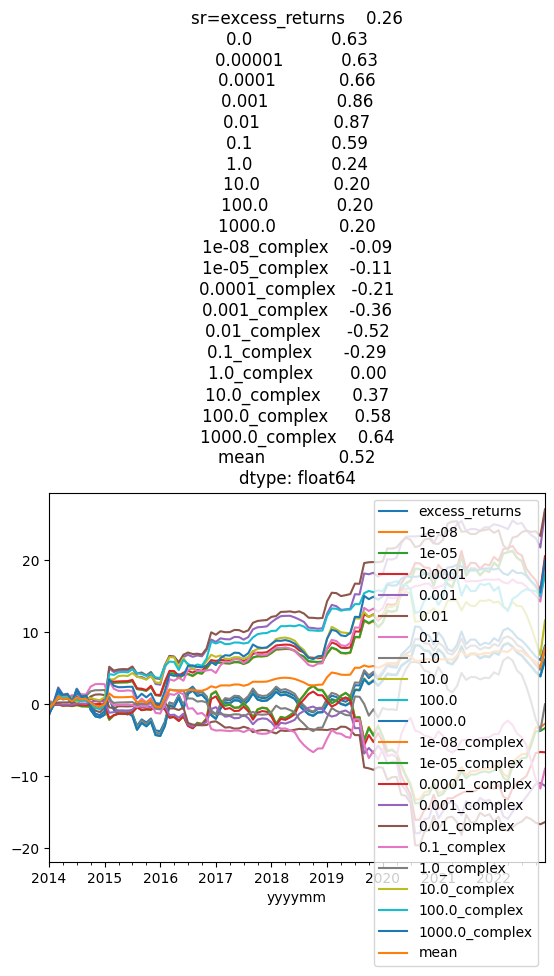

In [24]:
market_timing_returns_complex = oos_predictions * test_labels
market_timing_returns_complex.columns = [f'{x}_complex' for x in market_timing_returns_complex.columns]

cleaned_data = pd.concat([cleaned_data, market_timing_returns_complex], axis=1)

# 'excess_returns' are just market returns; it is important we keep them
# shrinkage_list: these are the columns corresponding to the simple linear model with just 13 predictors
tmp = cleaned_data[['excess_returns'] + shrinkage_list + list(market_timing_returns_complex.columns)].iloc[split:, :]
tmp = tmp / tmp.std()
tmp['mean'] = tmp.mean(1)
sr = sharpe_ratio(tmp)
tmp.cumsum().plot()
plt.title(f'sr={sr}')
#plt.savefig(os.path.join(folder, 'performance_pl9ot.jpeg'))

In [25]:
cleaned_data.corr()[0.001]

Index             0.061287
D12              -0.002953
E12              -0.074832
b/m               0.003334
tbl               0.081681
AAA              -0.058455
BAA              -0.025578
lty              -0.077669
ntis             -0.081661
Rfree             0.122648
infl              0.032748
ltr              -0.059624
corpr            -0.009951
svar             -0.033651
CRSP_SPvw         0.059897
CRSP_SPvwx        0.057769
excess_returns    0.581809
0.0               0.827059
0.00001           0.830705
0.0001            0.865087
0.001             1.000000
0.01              0.857924
0.1               0.863969
1.0               0.646031
10.0              0.600261
100.0             0.595274
1000.0            0.594771
1e-08_complex    -0.325847
1e-05_complex    -0.344095
0.0001_complex   -0.421288
0.001_complex    -0.444107
0.01_complex     -0.350738
0.1_complex       0.202443
1.0_complex       0.445823
10.0_complex      0.729974
100.0_complex     0.590986
1000.0_complex    0.883857
N

In [26]:
tstats = regression_with_tstats(predicted_variable=tmp['0.001_complex'], explanatory_variables=tmp[['excess_returns', 0.001]])
print(tstats)

const            -1.0
excess_returns   -4.3
0.001             0.4
Name: z, dtype: float64
